In [1]:
# Imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 40

# Reading & Cleaning Data

In [2]:
# Read in data.

vegan = pd.read_csv('../Data/vegan_all.csv')

vegan.head()

,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self
0,aIIisonmay,t2_fioduy9y,1664582453,xsgm3o,1,/r/vegan/comments/xsgm3o/which_dairy...,1,Hello! I'm vegan and I'm making a Po...,vegan,Which dairy corporations are the mos...,https://www.reddit.com/r/vegan/comme...,True
1,deepnek,t2_4nemzh03,1664582537,xsgn7o,0,/r/vegan/comments/xsgn7o/anyone_else...,1,[removed],vegan,Anyone else get sick to their stomac...,https://www.reddit.com/r/vegan/comme...,True
2,FloNightG123,t2_ggf8ss2i,1664583242,xsgwhr,0,/r/vegan/comments/xsgwhr/windy_lentils/,1,[removed],vegan,Windy lentils,https://www.reddit.com/r/vegan/comme...,True
3,Thatcoonfella,t2_qbozi,1664584319,xsha31,0,/r/vegan/comments/xsha31/vegan_choco...,1,NaN,vegan,"Vegan chocolate made in Keizer, Oreg...",https://i.redd.it/ztrgoa7aa3r91.jpg,False
4,tazzysnazzy,t2_4dvyf,1664584953,xshi92,1,/r/vegan/comments/xshi92/omnis_are_r...,1,NaN,vegan,Omnis are running out of excuses,https://theveganherald.com/2022/09/m...,False


In [3]:
vegan.shape

(1997, 12)

In [4]:
# Create label column
vegan['label'] = vegan['subreddit'].map({'vegan': 0, 'PlantBasedDiet': 1})

vegan.head()

,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,label
0,aIIisonmay,t2_fioduy9y,1664582453,xsgm3o,1,/r/vegan/comments/xsgm3o/which_dairy...,1,Hello! I'm vegan and I'm making a Po...,vegan,Which dairy corporations are the mos...,https://www.reddit.com/r/vegan/comme...,True,0
1,deepnek,t2_4nemzh03,1664582537,xsgn7o,0,/r/vegan/comments/xsgn7o/anyone_else...,1,[removed],vegan,Anyone else get sick to their stomac...,https://www.reddit.com/r/vegan/comme...,True,0
2,FloNightG123,t2_ggf8ss2i,1664583242,xsgwhr,0,/r/vegan/comments/xsgwhr/windy_lentils/,1,[removed],vegan,Windy lentils,https://www.reddit.com/r/vegan/comme...,True,0
3,Thatcoonfella,t2_qbozi,1664584319,xsha31,0,/r/vegan/comments/xsha31/vegan_choco...,1,NaN,vegan,"Vegan chocolate made in Keizer, Oreg...",https://i.redd.it/ztrgoa7aa3r91.jpg,False,0
4,tazzysnazzy,t2_4dvyf,1664584953,xshi92,1,/r/vegan/comments/xshi92/omnis_are_r...,1,NaN,vegan,Omnis are running out of excuses,https://theveganherald.com/2022/09/m...,False,0


In [5]:
vegan.isnull().sum()

author               0
author_fullname      0
created_utc          0
id                   0
num_comments         0
permalink            0
score                0
selftext           941
subreddit            0
title                0
url                  0
is_self              0
label                0
dtype: int64

In [6]:
vegan['selftext'].fillna(' ', inplace=True)

In [7]:
vegan.isnull().sum()

author             0
author_fullname    0
created_utc        0
id                 0
num_comments       0
permalink          0
score              0
selftext           0
subreddit          0
title              0
url                0
is_self            0
label              0
dtype: int64

# Section I : EDA

### Who are the top authors across BOTH subreddits (Vegan & PlantBased)

In [73]:
unique_users = vegan.groupby('author').count()['selftext'].sort_values(ascending = False)

print(len(unique_users))
unique_users


1514


author
OutcomeForeign6525      17
veganactivismbot        15
RealisticChard6         11
letsfallintothevoid      8
GraphCat                 8
                        ..
Planetbeforepleasure     1
PlanetEarthWorm          1
PinkiePaul               1
PinkiThinki              1
zoezie                   1
Name: selftext, Length: 1514, dtype: int64

In [10]:
#source: Tan
vegan['log_comments']=np.log10(vegan['num_comments']+1)

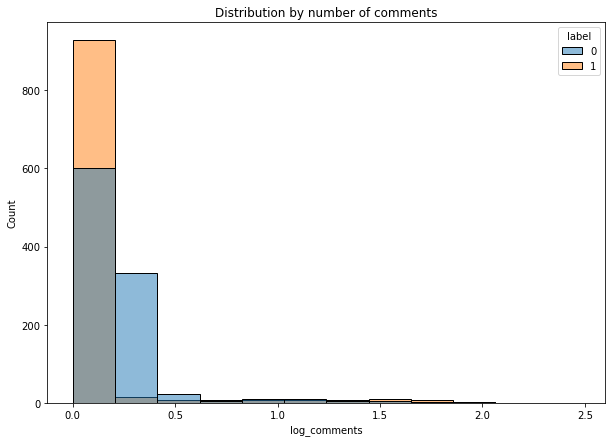

In [69]:
# More directional to show the plant-based subreddit directionally has more engagement on their posts


plt.figure(figsize= (10, 7))
sns.histplot(data = vegan, x='log_comments', hue = 'label');
plt.title('Distribution by number of comments')
plt.savefig('../Images/hist_Num_Comments.jpeg')
#plt.xticks()

In [12]:
vegan.num_comments.describe(percentiles = np.arange(0, 1.05, .05))

count    1997.000000
mean        1.408613
std         9.343655
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
15%         0.000000
20%         0.000000
25%         0.000000
30%         0.000000
35%         0.000000
40%         0.000000
45%         0.000000
50%         0.000000
55%         0.000000
60%         0.000000
65%         0.000000
70%         0.000000
75%         0.000000
80%         1.000000
85%         1.000000
90%         1.000000
95%         2.000000
100%      298.000000
max       298.000000
Name: num_comments, dtype: float64

In [13]:
top_comments = vegan.groupby('num_comments').count()['author'].sort_values(ascending = False)

print(len(top_comments))
top_comments

49


num_comments
0      1527
1       345
2        26
4        11
6         9
11        6
3         5
7         5
12        4
21        4
5         3
30        3
25        3
20        2
59        2
27        2
29        2
16        2
14        2
13        2
10        2
9         2
8         2
17        1
60        1
49        1
52        1
56        1
78        1
73        1
46        1
80        1
82        1
106       1
47        1
43        1
45        1
44        1
39        1
37        1
36        1
35        1
34        1
32        1
31        1
23        1
22        1
15        1
298       1
Name: author, dtype: int64

In [14]:
vegan.shape

(1997, 14)

In [15]:
vegan['post_length']  = vegan['selftext'].str.len()

In [16]:
vegan['post_word_count']  = vegan['selftext'].apply(lambda n: len(n.split()))

In [17]:
vegan.head()

,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,label,log_comments,post_length,post_word_count
0,aIIisonmay,t2_fioduy9y,1664582453,xsgm3o,1,/r/vegan/comments/xsgm3o/which_dairy...,1,Hello! I'm vegan and I'm making a Po...,vegan,Which dairy corporations are the mos...,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,593,112
1,deepnek,t2_4nemzh03,1664582537,xsgn7o,0,/r/vegan/comments/xsgn7o/anyone_else...,1,[removed],vegan,Anyone else get sick to their stomac...,https://www.reddit.com/r/vegan/comme...,True,0,0.00000,9,1
2,FloNightG123,t2_ggf8ss2i,1664583242,xsgwhr,0,/r/vegan/comments/xsgwhr/windy_lentils/,1,[removed],vegan,Windy lentils,https://www.reddit.com/r/vegan/comme...,True,0,0.00000,9,1
3,Thatcoonfella,t2_qbozi,1664584319,xsha31,0,/r/vegan/comments/xsha31/vegan_choco...,1,,vegan,"Vegan chocolate made in Keizer, Oreg...",https://i.redd.it/ztrgoa7aa3r91.jpg,False,0,0.00000,1,0
4,tazzysnazzy,t2_4dvyf,1664584953,xshi92,1,/r/vegan/comments/xshi92/omnis_are_r...,1,,vegan,Omnis are running out of excuses,https://theveganherald.com/2022/09/m...,False,0,0.30103,1,0


In [18]:
vegan.num_comments.describe()

count    1997.000000
mean        1.408613
std         9.343655
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       298.000000
Name: num_comments, dtype: float64

In [19]:
# top 5 shortest posts
vegan.sort_values(by = 'post_length')[['selftext']].head()

,selftext
1996,
1487,
1485,
738,
1483,


In [20]:
# top 5 longest statuses
vegan.sort_values(by = 'post_length')[['selftext']].tail()

,selftext
750,I just had this very upsetting encou...
647,Hi everyone. I volunteer with Crazy ...
1489,**PREMISE**\n\nI’ll start with the a...
1175,#**Preface**\n\nI’m bringing forth t...
779,Step 1: Grab some non-dairy milk!\n\...


In [21]:
# top 5 shortest statuses
vegan.sort_values(by = 'post_word_count')[['selftext']].head()

,selftext
1996,
1487,
1485,
738,
1483,


In [22]:
#source: Tan
vegan['log_post_length']=np.log10(vegan['post_length']+1)

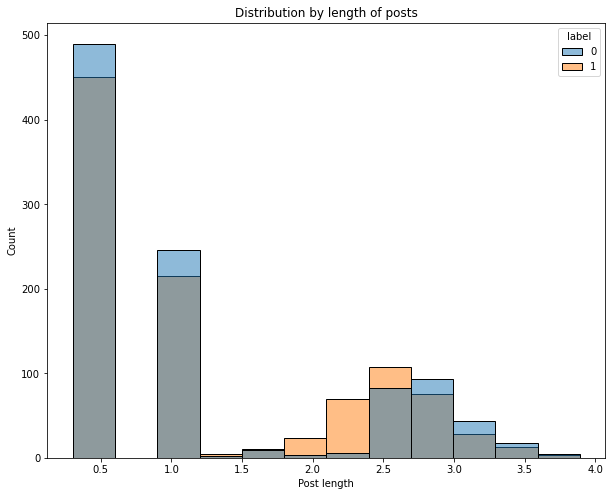

<Figure size 432x288 with 0 Axes>

In [23]:
# plt.hist(distribution of post length and word counts)

plt.figure(figsize=(10,8))
plt.xlabel('Post length')
plt.title('Distribution by length of posts')
sns.histplot(data = vegan, x='log_post_length', hue = 'label');
plt.show()
plt.savefig('../Images/hist_Len_Posts.jpeg')

In [25]:
pd.set_option('display.width', 2000)
long_posts = vegan.sort_values(by = 'post_word_count')[['selftext']].tail()

print(long_posts)


                                     selftext
1749  Hey all, I’m mostly a lurker but I’d...
218   The Veal of Ignorance \n\n​When cons...
750   I just had this very upsetting encou...
1175  #**Preface**\n\nI’m bringing forth t...
1489  **PREMISE**\n\nI’ll start with the a...


In [26]:
#source: Tan
vegan['log_post_word_count']=np.log10(vegan['post_word_count']+1)

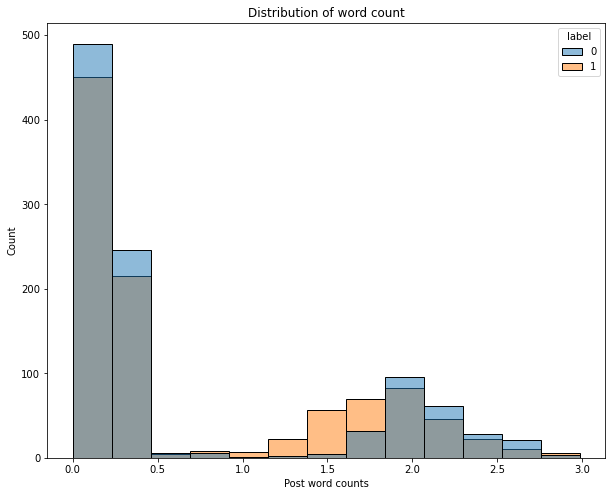

<Figure size 432x288 with 0 Axes>

In [27]:
# plt.hist(distribution of post length and word counts)

plt.figure(figsize=(10,8))
plt.xlabel('Post word counts')
plt.title('Distribution of word count')
sns.histplot(data = vegan, x='log_post_word_count', hue = 'label');
plt.show()
plt.savefig('../Images/hist_WordCount.jpeg')

## Analyzing Sustainability Words in DataFrame

In [30]:
vegan[vegan['selftext'].str.contains('sustainability')]

,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,label,log_comments,post_length,post_word_count,log_post_length,log_post_word_count
760,jungleskater,t2_bmbdc3xj,1646147459,t4a2i5,4,/r/vegan/comments/t4a2i5/rescue_chic...,1,I'm trying to figure out what to do....,vegan,Rescue chickens making too many eggs 🙈,https://www.reddit.com/r/vegan/comme...,True,0,0.69897,896,175,2.952792,2.245513


In [31]:
vegan[vegan['selftext'].str.contains('organic')]

,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,label,log_comments,post_length,post_word_count,log_post_length,log_post_word_count
303,QueenFrankie420,t2_2t4vhpr3,1656636117,vonkal,1,/r/vegan/comments/vonkal/idk_what_mo...,1,I kind of got into an argument with ...,vegan,idk what more I could have said?,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,2509,482,3.399674,2.683947
484,Hardcorr_4448,t2_e4o6ga5g,1654102928,v2lqmd,1,/r/vegan/comments/v2lqmd/im_allergic...,1,"I am a vegetarian my whole life, Veg...",vegan,"I’m allergic to soy, what now? Any t...",https://www.reddit.com/r/vegan/comme...,True,0,0.30103,540,97,2.733197,1.991226
915,desuwarrior13,t2_dg6vlsyo,1641002976,rt92id,0,/r/vegan/comments/rt92id/tofu_altern...,1,"Personally, I am highly allergic to ...",vegan,Tofu Alternative: Pumfu,https://www.reddit.com/r/vegan/comme...,True,0,0.00000,480,92,2.682145,1.968483
1163,houseofprimetofu,t2_ordru,1662507476,x7pgkw,0,/r/PlantBasedDiet/comments/x7pgkw/vi...,1,I have been on a plant diet since 20...,PlantBasedDiet,"Vitamin B Complex, how do you get yo...",https://www.reddit.com/r/PlantBasedD...,True,1,0.00000,1980,341,3.296884,2.534026
1300,Yae_Bae,t2_jl16p91k,1656693015,vp4wyk,0,/r/PlantBasedDiet/comments/vp4wyk/wh...,1,"For some background, about half year...",PlantBasedDiet,What else should I try?,https://www.reddit.com/r/PlantBasedD...,True,1,0.00000,2653,510,3.423901,2.708421
1925,maquis_00,t2_14v8cw,1641219790,rv2t25,0,/r/PlantBasedDiet/comments/rv2t25/be...,1,"So far, I've been buying my cashews ...",PlantBasedDiet,Best place/way to buy unsalted unroa...,https://www.reddit.com/r/PlantBasedD...,True,1,0.00000,583,109,2.766413,2.041393
1981,AShipChandler,t2_h1z21,1641667821,rz6v6k,0,/r/PlantBasedDiet/comments/rz6v6k/mu...,1,I am about to start taking Chaga an...,PlantBasedDiet,Mushrooms for Toddler,https://www.reddit.com/r/PlantBasedD...,True,1,0.00000,459,83,2.662758,1.924279


In [32]:
vegan[vegan['selftext'].str.contains('sustainable')]

,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,label,log_comments,post_length,post_word_count,log_post_length,log_post_word_count
19,One-Treacle-1037,t2_sqj9gbz7,1664595275,xskz52,1,/r/vegan/comments/xskz52/kings_guard...,1,After Queen Elizabeth ii passed away...,vegan,King’s Guards and Bearskins,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,547,90,2.738781,1.959041
39,eruannie,t2_2dh1i584,1664624389,xst52a,1,/r/vegan/comments/xst52a/substitutes...,1,I’m used to eat Greek yogurt everyda...,vegan,Substitutes for yogurt?,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,987,179,2.994757,2.255273
1307,tom_oakley,t2_1vy0sq3k,1656752372,vpnj32,0,/r/PlantBasedDiet/comments/vpnj32/ho...,1,"So this isn't about trying to ""make ...",PlantBasedDiet,How else can I get a reluctant famil...,https://www.reddit.com/r/PlantBasedD...,True,1,0.00000,2621,450,3.418633,2.654177
1880,ptrichardson,t2_dyk98i,1644182949,sm84ih,7,/r/PlantBasedDiet/comments/sm84ih/to...,1,"I'm starting tomorrow, so today was ...",PlantBasedDiet,To anyone who is doing or has done t...,https://www.reddit.com/r/PlantBasedD...,True,1,0.90309,672,126,2.828015,2.103804


In [33]:
vegan[vegan['selftext'].str.contains('environment')]

,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,label,log_comments,post_length,post_word_count,log_post_length,log_post_word_count
42,THothersall,t2_lt9dltw7,1664628143,xsuc9n,1,/r/vegan/comments/xsuc9n/do_you_acti...,1,Hi everyone.\n\nI am currently in n...,vegan,Do you actively avoid foods containi...,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,2837,432,3.453012,2.636488
179,centipawn,t2_smpwi6z,1662064958,x3i1bu,1,/r/vegan/comments/x3i1bu/this_articl...,1,I usually like opinion pieces in The...,vegan,This article has exactly one sentenc...,https://www.theguardian.com/commenti...,False,0,0.30103,380,58,2.580925,1.770852
292,RstyShackleford2,t2_69rjli0b,1659373111,wdmfs8,1,/r/vegan/comments/wdmfs8/exclusionar...,1,"Hi, I was hoping to get some opinion...",vegan,Exclusionary Lifestyle,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,2215,383,3.345570,2.584331
342,EchaleCandela,t2_oculekxi,1656667557,vowo55,1,/r/vegan/comments/vowo55/please_help...,1,"So, I posted this [European citizens...",vegan,"Please, help me respond as accuratel...",https://www.reddit.com/r/vegan/comme...,True,0,0.30103,2007,309,3.302764,2.491362
380,nu2allthis,t2_16pq48,1656687132,vp2og4,1,/r/vegan/comments/vp2og4/im_writing_...,1,Hello everyone!\n\nI'm currently wri...,vegan,I'm writing a piece on veganism and ...,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,630,113,2.800029,2.056905
397,N1903,t2_otvu6yu9,1656694617,vp5hcs,1,/r/vegan/comments/vp5hcs/ethical_que...,1,If I have decided to forgo the use o...,vegan,Ethical question,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,986,180,2.994317,2.257679
550,missblimah,t2_6p7158pu,1651410074,ufzfa5,1,/r/vegan/comments/ufzfa5/a_vision_of...,1,"By most accounts, today we are rough...",vegan,A vision of power: what will the wor...,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,3559,598,3.551450,2.777427
581,Admirable_Candle2404,t2_9guh9dv4,1651427328,ug58ql,1,/r/vegan/comments/ug58ql/vegan_impos...,1,I have been vegan for about 6 months...,vegan,Vegan Imposter Syndrome,https://www.reddit.com/r/vegan/comme...,True,0,0.30103,1331,247,3.124504,2.394452
833,Nice-Refrigerator524,t2_9czj0rf6,1643707879,shqyxz,0,/r/vegan/comments/shqyxz/vegan_beanies/,1,Hi everyone! I am looking for an adv...,vegan,Vegan beanies,https://www.reddit.com/r/vegan/comme...,True,0,0.00000,455,80,2.658965,1.908485
912,Henry_Every,t2_5l3y8p9o,1640999998,rt8685,0,/r/vegan/comments/rt8685/told_my_gir...,1,Might be a weird title but hear me o...,vegan,Told my girlfriend that I'm vegan to...,https://www.reddit.com/r/vegan/comme...,True,0,0.00000,1809,351,3.257679,2.546543


In [34]:
# Instantiate Sentiment Intensity Analyzer
sa = SentimentIntensityAnalyzer()

In [35]:
# let's analyze sentiments around the following sustainability words

sustainability = ['organic', 'environment', 'sustainable', 'sustainability']

for word in sustainability:
    result = word.encode('utf-8')
    print(result)

b'organic'
b'environment'
b'sustainable'
b'sustainability'


In [55]:
# Calculate sentiment of sustainability.
#sa.polarity_scores(result)

## Set up X, y variables, train/test/split

In [38]:
X = vegan['selftext']
y = vegan['label']

In [39]:
# Check what we need to check in a classification problem.
y.value_counts(normalize = True)

1    0.500751
0    0.499249
Name: label, dtype: float64

In [40]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

## Analyze text data by countvectorizing, remove stop words, explore n-grams


In [41]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')

In [42]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [43]:
# Transform the corpus.
X_train = cvec.transform(X_train)

In [44]:
X_test = cvec.transform(X_test)

In [45]:
X_train.shape

(1497, 6274)

In [46]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening

X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
X_train_df.head()

,000,01,025,028f81b28b20316bbcb9f537cebc29f2d24a02de,099482404932,0g,10,100,1000,10000,...,yuck,yukon,yup,zero,zhacai,zombie,zone,zooming,zoos,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Top StopWords in DataFrame

Unfortunately it doesnt provide much insight


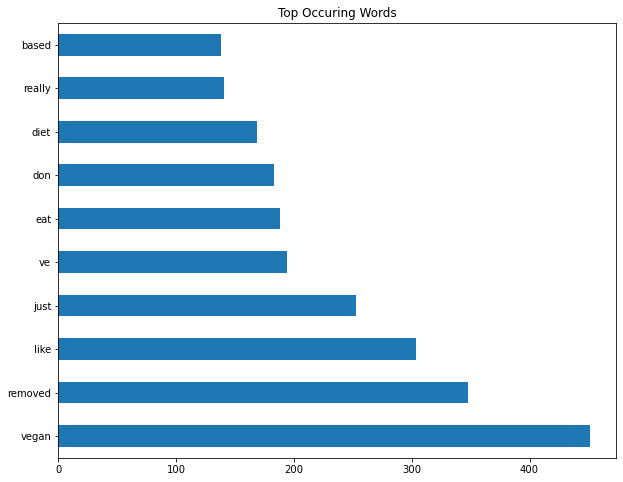

In [49]:
# Plot top occuring words
plt.figure(figsize=(10,8))
plt.title('Top Occuring Words')
X_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [56]:
#df_test = pd.concat([y_test,X_test], axis = 1)

In [51]:
#df_train = pd.concat([y_train,X_train_df], axis = 1)

In [57]:
#df_full = pd.concat([df_test, df_train], axis = 0)

In [58]:
#df_full[df_full['label'] == 0]

In [59]:
#df_full[df_full['label'] == 1]

In [41]:
X_train_df.sum().sort_values(ascending = False).head(20)

vegan      451
removed    348
like       304
just       253
ve         194
eat        188
don        183
diet       169
really     141
based      138
food       137
plant      133
want       129
eating     128
know       124
feel       124
https      124
make       121
animal     120
time       117
dtype: int64

## Analyzing Bigrams in DataFrame...

In [64]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [65]:
# Instantiate (w/ ngrams)
cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))

#Fit
cvec.fit(X_train)

#Transform
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [66]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening

X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


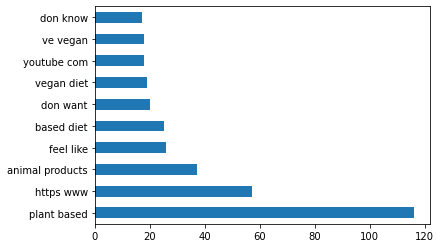

In [67]:
# Plot top occuring words
# This plot shows the same and doesnt provide additional insights on top occuring words

X_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

# Section II :  Modeling

In [132]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [133]:
# Baseline Accuracy
y_test.value_counts(normalize = True)

1    0.5
0    0.5
Name: label, dtype: float64

In [134]:
# Seting a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

## Model 1 : MultinomialNB

In [135]:
# Creating Model # 1 using the following values of hyperparameters:


pipe_params = {
    'cvec__max_features': [2500, 3500, 4500, 5500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

In [136]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid = pipe_params, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [137]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2500, 3500, 4500, 5500],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [138]:
# Best Params for the best accuracy score

gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

In [139]:
# Score model on training set.
gs.score(X_train, y_train)

0.6112224448897795

In [140]:
# Score model on testing set doesnt show much improvement in baseline score of 50%
gs.score(X_test, y_test)

0.55

## Model 2: TfidfVectorizer with MultinomialNB

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [82]:
# Adding tf-idf vectorizer to transform data and then applied Multinomial Naive Bayes (estimator)

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [98]:
 # Used following values of hyperparameters:

pipe_tvec_params = {
    'tvec__max_features': [1_000, 2_000, 3_000, 4_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [99]:
# Instantiate GridSearchCV.
gs_tvec = GridSearchCV(pipe_tvec,
                      param_grid = pipe_tvec_params,
                      cv = 5)

In [100]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [1000, 2000, 3000, 4000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [101]:
# Score model on training set.
gs_tvec.score(X_train, y_train)

0.6325985303941216

In [102]:
# Score model on testing set.
gs_tvec.score(X_test, y_test)

0.584

In [103]:
# Best params
gs_tvec.best_params_

{'tvec__max_features': 3000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

## Model 3: Random Forest 

In [145]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [146]:
# Adding tf-idf vectorizer to transform data and then applied Random Forest Model (estimator)

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [147]:
 # Used following values of hyperparameters:


pipe_tvec_params = {
    'tvec__max_features': [1_000, 2_000, 3_000, 4_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [148]:
# Instantiate GridSearchCV.
rf_tvec = GridSearchCV(pipe_tvec,
                      param_grid = pipe_tvec_params,
                      cv = 5)

In [149]:
rf_tvec.fit(X_train, y_train)
print(rf_tvec.best_score_)
rf_tvec.best_params_

0.6172352285395764


{'tvec__max_features': 1000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [150]:
rf_tvec.score(X_test, y_test)

0.624

In [164]:
pd.DataFrame(list(zip(X_train_df.columns, rf_tvec.best_estimator_['rf'].feature_importances_))).sort_values (by = 1, ascending = False)